In [1]:
# prompt: import pertinent packages for logistic regression and elastic net and EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
# Loading dataset consisting of train and test file
train_df=pd.read_csv('/content/genetic_data_train.csv')
test_df=pd.read_csv('/content/genetic_data_test.csv')


In [3]:
# prompt: show the EDA for train_df

# Display the first five rows of the train_df dataframe.
print(train_df.head())

# Print the number of rows and columns in the train_df dataframe.
print(train_df.shape)

# Print the data types of each column in the train_df dataframe.
print(train_df.dtypes)

# Print the descriptive statistics of the train_df dataframe.
print(train_df.describe())




         PC1       PC2       PC3       PC4        PC5       PC6       PC7  \
0 -10.901171  0.798743 -1.143301 -1.070960  11.856396 -2.265965  4.536405   
1  -9.990054  1.416821 -0.729626 -0.443621  10.418594  0.443514  2.640659   
2  -9.345388  2.913054 -0.921421  0.029173  10.672615 -2.052552  5.140476   
3 -11.221507  1.733021 -2.339817  0.045786  13.195087 -3.068897  2.863434   
4 -10.175158  2.066307 -0.785493 -0.632400   7.461272 -1.643509  0.715258   

        PC8       PC9      PC10 Ancestry  
0  1.519959 -2.214294 -0.671274  African  
1 -4.637746  3.351629 -0.671274  African  
2 -1.451096  0.444183 -0.671274  African  
3 -2.259194  2.374566 -0.671274  African  
4 -3.982752  0.098681 -0.671274  African  
(183, 11)
PC1         float64
PC2         float64
PC3         float64
PC4         float64
PC5         float64
PC6         float64
PC7         float64
PC8         float64
PC9         float64
PC10        float64
Ancestry     object
dtype: object
              PC1         PC2      

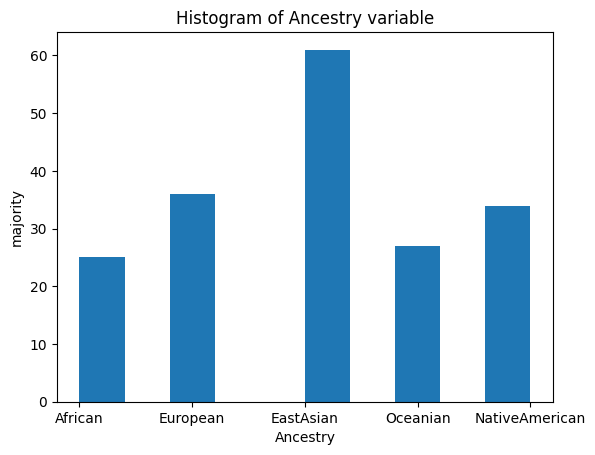

In [4]:
# Create a histogram of the target variable in the train_df dataframe.
plt.hist(train_df['Ancestry'], bins=10)
plt.xlabel('Ancestry')
plt.ylabel('majority')
plt.title('Histogram of Ancestry variable')
plt.show()

In [5]:
#finding the number of null value in features
train_df.isnull().sum()

PC1         0
PC2         0
PC3         0
PC4         0
PC5         0
PC6         0
PC7         0
PC8         0
PC9         0
PC10        0
Ancestry    0
dtype: int64

In [6]:
#changing categorical output into numerical one
le=LabelEncoder()
train_df['Ancestry']=le.fit_transform(train_df['Ancestry'])


<Axes: >

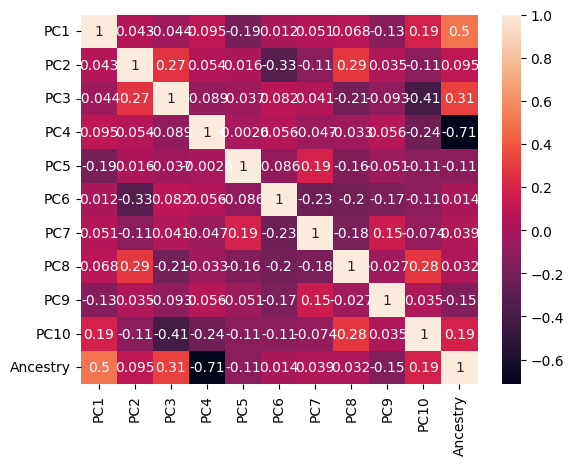

In [7]:
#defining correlation matrix for training dataset
train_df_corr=train_df.corr()
sns.heatmap(train_df_corr,annot=True)

In [8]:

# Extract the features with a correlation greater than 0.1 with respect to Ancestry
correlated_features = train_df_corr[abs(train_df_corr["Ancestry"]) > 0.1]["Ancestry"].index.tolist()

# Print the correlated features
print(correlated_features)


['PC1', 'PC3', 'PC4', 'PC5', 'PC9', 'PC10', 'Ancestry']


In [9]:
#deviding training dataset into features and target
x_train=train_df[correlated_features[:6]]
y_train=train_df['Ancestry']

In [10]:
x_train.head(0)

,PC1,PC3,PC4,PC5,PC9,PC10


In [11]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Ancestry, dtype: int64

In [12]:
#standardize the features
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
#y_train=ss.fit_transform(np.array(y_train).reshape(-1,1))

In [13]:
#implementing logistic regression on training dataset
model=LogisticRegression(multi_class='multinomial')
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [14]:
#making up the features and target in test dataset
x_test=test_df[correlated_features[:6]]
y_test=test_df['Ancestry']

In [15]:
y_test.shape

(111,)

In [16]:
#removing rows in test dataset consisting of unknown ancestry
x_test=x_test.loc[y_test!='Unknown',:]
y_test=y_test[y_test!='Unknown']


In [17]:
print(y_test.shape)
print(x_test.shape)

(106,)
(106, 6)


In [18]:
#pedicted values
y_pred=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [19]:
#change the categorical test target into numerical one
y_test=le.fit_transform(y_test)

In [20]:
#calculating accuracy regularization
accuracy=model.score(x_test,y_test)
print(accuracy)

0.5377358490566038


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [21]:
#calculating error without regularization
error=mean_squared_error(y_test,y_pred)
print(error)

1.9622641509433962


In [22]:
#logistic regression model with ridge(l1) penalty
model=LogisticRegression(penalty='l1',solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [23]:
#pedicted values with l1 (Ridge) rigularization
y_pred=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [24]:
#accuracy with l1 regularization
accuracy=model.score(x_test,y_test)
print(accuracy)

0.5283018867924528


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [25]:
#error with l1 regularization
error=mean_squared_error(y_test,y_pred)
print(error)

1.9528301886792452


In [26]:
#logistic regression model with lasso(l2) penalty
model=LogisticRegression(penalty='l2',solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [27]:
#pedicted values with lasso(l2) rigularization
y_pred=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [28]:
#accuracy  with lasso(l2) rigularization
accuracy=model.score(x_test,y_test)
print(accuracy)

0.5283018867924528


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [29]:
#error  with lasso(l2) rigularization
error=mean_squared_error(y_test,y_pred)
print(error)

1.9528301886792452


In [30]:
#logistic regression model with elastic net regularization
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0, max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(l1_ratio=0.5, max_iter=1000, penalty='elasticnet',
                   solver='saga')

In [31]:
#predicted value with elastic net regularization
y_pred=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [32]:
#accuracy  with elastic net rigularization
accuracy=model.score(x_test,y_test)
print(accuracy)

0.5377358490566038


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [33]:
#error  with elastic net rigularization
error=mean_squared_error(y_test,y_pred)
print(error)

1.7830188679245282


In [34]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
#test dataset with two most correlated features for visualization
x_test_2=x_test.loc[:,['PC1','PC4']]


In [36]:
#logistic regression with elastic net on test dataset for binary classification
model.fit(x_test_2,y_test)

LogisticRegression(l1_ratio=0.5, max_iter=1000, penalty='elasticnet',
                   solver='saga')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


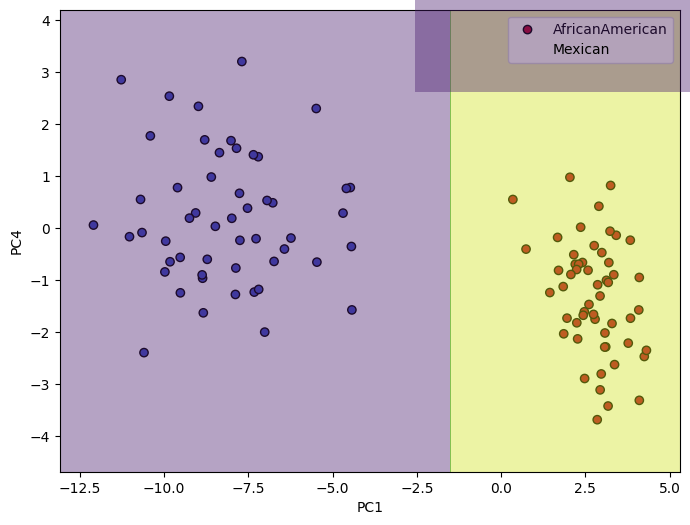

In [47]:
#plot the test dataset with two most correlated features (PC1,PC4) with respect to target(Ancestry)
plt.figure(figsize=(8, 6))
plt.scatter(x_test.loc[:,'PC1'],x_test.loc[:,'PC4'], c=y_test, cmap='coolwarm', marker='o', edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC4')
x_min, x_max = x_test.loc[:, 'PC1'].min() - 1, x_test.loc[:, 'PC1'].max() + 1
y_min, y_max = x_test.loc[:, 'PC4'].min() - 1, x_test.loc[:, 'PC4'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.legend(np.unique(le.inverse_transform(y_test)))